### Initial Data Exploration

In [1]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
df_filtered = pd.read_csv ("./UPDATED_Employee turnover_combined dataset.csv", index_col=0, low_memory=False)

In [3]:
df_filtered.shape

(9635, 110)

In [4]:
# Observe only office and field employees from the emplyees_turnover_promotions report
df_filtered = df_filtered[df_filtered['Contract Type'].isin(['Permanent'])]

In [5]:
df_filtered.shape

(9179, 110)

In [7]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9179 entries, 0 to 9634
Columns: 110 entries, Employee Status to Overall Performance Rating 2023
dtypes: float64(11), int64(1), object(98)
memory usage: 7.8+ MB


In [9]:
# remove duplicates and unnecessary columns
df_filtered = df_filtered.drop_duplicates()

In [10]:
df_filtered.shape

(9012, 110)

In [11]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9012 entries, 0 to 9634
Columns: 110 entries, Employee Status to Overall Performance Rating 2023
dtypes: float64(11), int64(1), object(98)
memory usage: 7.6+ MB


In [12]:
print(list(df_filtered.columns))

['Employee Status', 'Employment Details System hire/migration date', 'Employment Details Original Start Date', 'User/Employee ID', 'Local pay-roll id', 'Username', 'Salutation', 'First Name', 'Last Name', 'Nick name_x', 'Date of Birth_x', 'Gender_x', 'Business  Phone Information Phone Number', 'Business  Email Information Email Address', 'Cost Centre_x', 'FTE_x', 'Employee Type', 'Contract Type', 'Contract End Date_x', 'Country/Region_x', 'Company_x', 'Location', 'Function', 'Manager_x', 'Manager User Sys ID', 'Position', 'Title_x', 'Position Level', 'ApprovedPosition_x', 'Job Title Job Title Code_x', 'Job Title Job Title_x', 'Pay Grade_x', 'Position Entry Date', 'Employment Details Termination Date', 'User/Employee ID.1', 'ELT-1_x', 'Username_x', 'First Name_x', 'Last Name_x', 'Employee Status_x', 'Function_x', 'Location_x', 'Employee Type_x', 'Contract Type_x', 'Position Level_x', 'Manager User Sys ID_x', 'Employment Details Original Start Date_x', 'Employment Details System hire/mig

In [13]:
# Drop columns with sensitive employee and manager data
df_filtered = df_filtered.drop(columns=['Local pay-roll id', 'Salutation', 'First Name', 'Last Name', 'Nick name_x', 'Business  Phone Information Phone Number', 'Business  Email Information Email Address', 'Cost Centre_x', 'Manager_x', 'Manager User Sys ID', 'Position', 'Position_y','Pay Grade_x', 'ELT-1_x', 'First Name_x', 'Last Name_x', 'Nick name_y', 'Cost Centre_y', 'Position_x', 'ApprovedPosition_y', 'Job Title Job Title Code_y', 'Pay Grade_y', 'Manager User Sys ID_x', 'Manager_y', 'ELT-1_y', 'First Name_y', 'Last Name_y', 'Manager User Sys ID_y', 'Function','Position Level'])

### Initial Exploratory Data Analysis

In [13]:
# Check the number of rows and columns in the new merged dataset
df_filtered.shape

(9012, 110)

In [14]:
# Explore the data summary and the different data types in each column
df_filtered.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9012 entries, 0 to 9634
Columns: 110 entries, Employee Status to Overall Performance Rating 2023
dtypes: float64(11), int64(1), object(98)
memory usage: 7.6+ MB


In [ ]:
# Check the summary statistics for the numeric values
df_filtered.describe()

In [16]:
# Check the value count per column
df_filtered.count(axis = 0)

Employee Status                                  9012
Employment Details System hire/migration date    9012
Employment Details Original Start Date           9007
User/Employee ID                                 9012
Local pay-roll id                                6126
                                                 ... 
Overall Performance Rating 2019                  5941
Overall Performance Rating 2020                  5946
Overall Performance Rating 2021                  5946
Overall Performance Rating 2022                  5946
Overall Performance Rating 2023                  5946
Length: 110, dtype: int64

In [ ]:
# Extract the number of unique values per column
df_filtered.nunique()

In [ ]:
# Check the number of missing values in each column
df_filtered.isnull().sum()

In [20]:
df_filtered = df_filtered.drop_duplicates()

In [21]:
df_filtered.duplicated().sum()

0

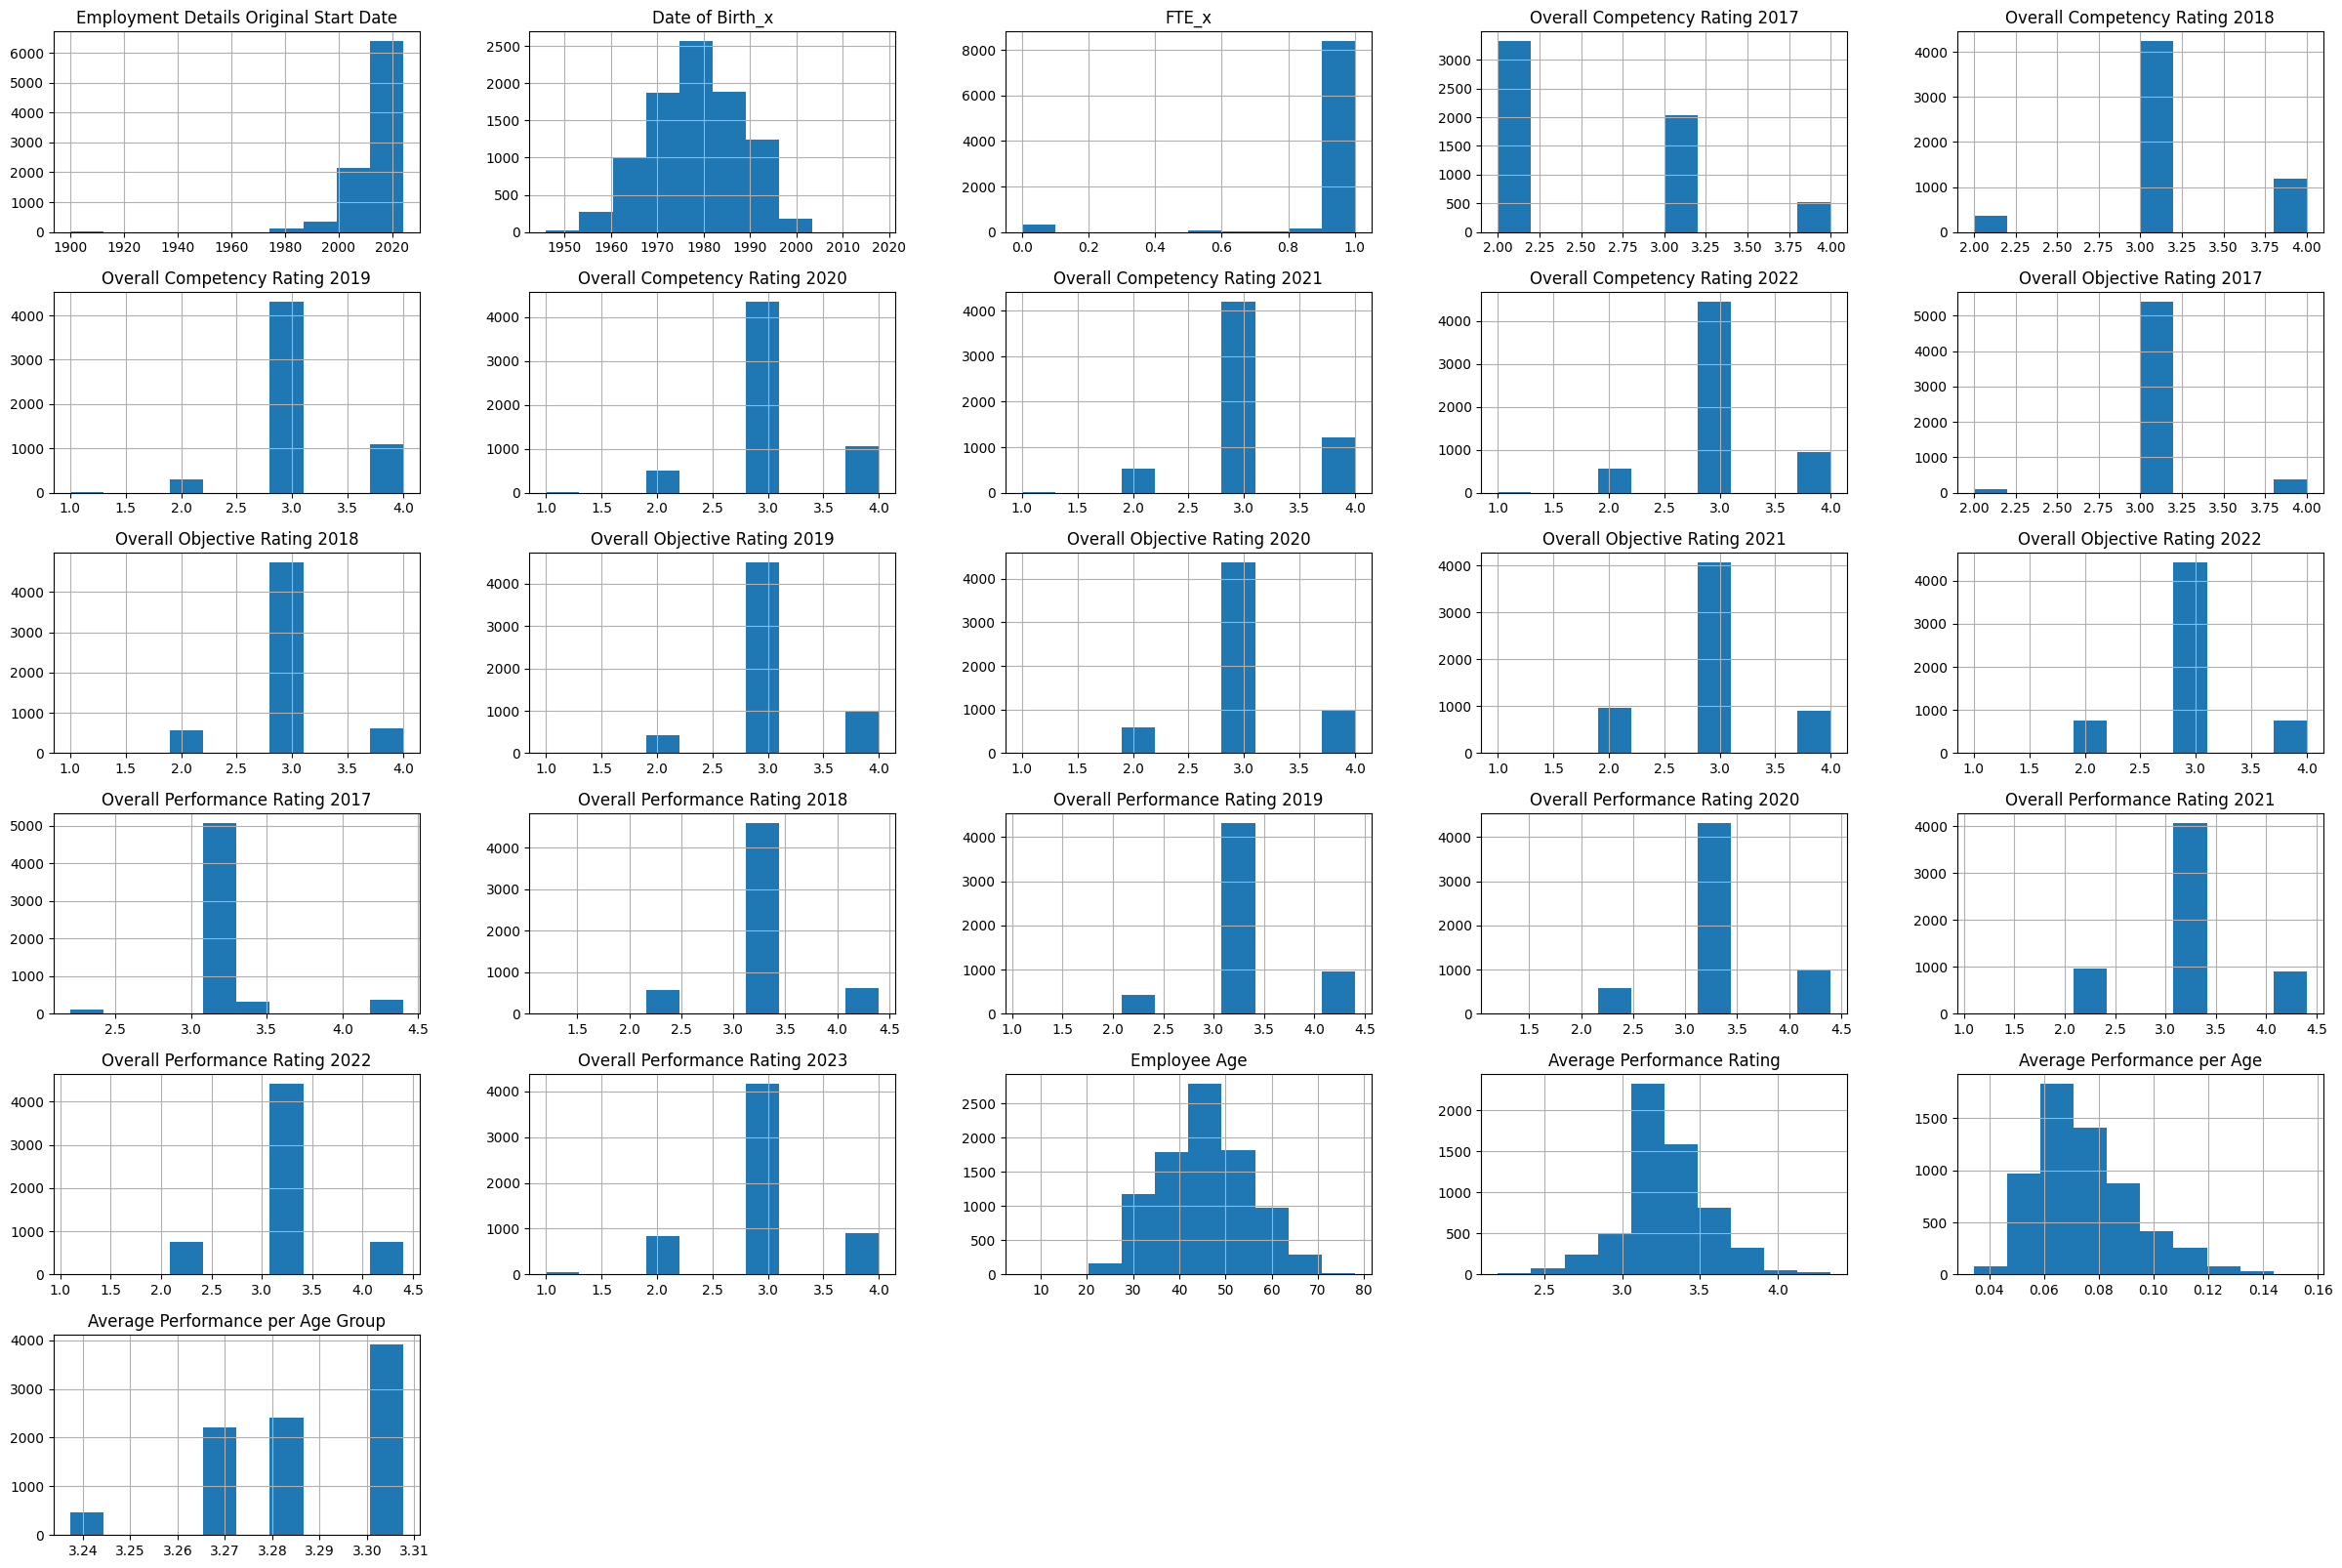

In [51]:
# Creating a histogram to investigate the distribution of numerical data (before mean imputation)
df_filtered.hist(figsize=(30, 20))
plt.show()

In [ ]:
# Create box plots to identify outliers:
df_filtered.boxplot(figsize=(50, 50))
plt.show()

In [ ]:
# Pair plots to visualize relationships between pairs of variables
import seaborn as sns
sns.pairplot(df_filtered)
plt.show()

In [ ]:
# Exploring correlations with a heatmap
import seaborn as sns

correlation_matrix = df_filtered.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
#Investigate rows with missing values:
df_filtered[df_filtered.isnull().any(axis=1)]

In [ ]:
# Calculate the percentage of missing data in each column
missing_percentage = df_filtered.isnull().sum() * 100 / len(df_filtered)
missing_percentage

In [ ]:
print(df_filtered.dtypes)

In [ ]:
# Check if the dataset is imbalanced by observing the number of instances for each class in the target variable ('Employee status') -> imbalanced
class_counts_employee_status = df_filtered['Employee Status'].value_counts()
print(class_counts_employee_status)

### Data Pre-Processing

In [ ]:
df_filtered.info()

In [23]:
# Convert object features into categorical

# Employee status
employee_status_categories = ['Active', 'Discarded', 'Dormant', 'Terminated', 'Unpaid Leave']

# Convert the 'Feature' column to a categorical type with predefined categories
df_filtered.loc[:,'Employee Status'] = pd.Categorical(df_filtered['Employee Status'], categories = employee_status_categories, ordered=False)
df_filtered.loc[:,'Employee Status_x'] = pd.Categorical(df_filtered['Employee Status_x'], categories = employee_status_categories, ordered=False)
df_filtered.loc[:,'Employee Status_y'] = pd.Categorical(df_filtered['Employee Status_y'], categories = employee_status_categories, ordered=False)

In [24]:
df_filtered.loc[:,'Employment Details Termination Date'] = pd.to_datetime(df_filtered['Employment Details Termination Date'])
df_filtered.loc[:,'Employment Details Termination Date_x'] = pd.to_datetime(df_filtered['Employment Details Termination Date_x'])
df_filtered.loc[:,'Employment Details Termination Date_y'] = pd.to_datetime(df_filtered['Employment Details Termination Date_y'])

In [25]:
df_filtered.loc[:,'Employment Details Original Start Date'] = pd.to_datetime(df_filtered['Employment Details Original Start Date'])
df_filtered.loc[:,'Employment Details Original Start Date_x'] = pd.to_datetime(df_filtered['Employment Details Original Start Date_x'])
df_filtered.loc[:,'Employment Details Original Start Date_y'] = pd.to_datetime(df_filtered['Employment Details Original Start Date_y'])

In [26]:
df_filtered.loc[:,'Position Entry Date'] = pd.to_datetime(df_filtered['Position Entry Date'])
df_filtered.loc[:,'Position Entry Date_x'] = pd.to_datetime(df_filtered['Position Entry Date_x'])
df_filtered.loc[:,'Position Entry Date_y'] = pd.to_datetime(df_filtered['Position Entry Date_y'])

In [27]:
df_filtered.loc[:,'Employment Details System hire/migration date'] = pd.to_datetime(df_filtered['Employment Details System hire/migration date'])
df_filtered.loc[:,'Employment Details System hire/migration date_x'] = pd.to_datetime(df_filtered['Employment Details System hire/migration date_x'])
df_filtered.loc[:,'Employment Details System hire/migration date_y'] = pd.to_datetime(df_filtered['Employment Details System hire/migration date_y'])

In [28]:
df_filtered.loc[:,'Date of Birth_x'] = pd.to_datetime(df_filtered['Date of Birth_x'])
df_filtered.loc[:,'Date of Birth_y'] = pd.to_datetime(df_filtered['Date of Birth_y'])

In [29]:
df_filtered.loc[:,'Contract End Date_x'] = pd.to_datetime(df_filtered['Contract End Date_x'])
df_filtered.loc[:,'Contract End Date_y'] = pd.to_datetime(df_filtered['Contract End Date_y'])

In [31]:
# Gender: One-hot encoding
encoder = LabelEncoder()
df_filtered.loc[:, 'Gender_x'] = encoder.fit_transform(df_filtered['Gender_x'])
df_filtered.loc[:, 'Gender_y'] = encoder.fit_transform(df_filtered['Gender_y'])


In [32]:
df_filtered.loc[:, 'Contract Type'] = df_filtered['Contract Type'].astype('category')
df_filtered.loc[:, 'Employee Type'] = df_filtered['Employee Type'].astype('category')
df_filtered.loc[:, 'Employee Type_x'] = df_filtered['Employee Type_x'].astype('category')
df_filtered.loc[:, 'Employee Type_y'] = df_filtered['Employee Type_y'].astype('category')

In [33]:
# Employment Details Regret Termination
df_filtered.loc[:,'Employment Details Regret Termination'] = df_filtered['Employment Details Regret Termination'].apply(lambda x: 0 if x == 'No' else 1)
df_filtered.loc[:,'Regret Termination'] = df_filtered['Regret Termination'].apply(lambda x: 0 if x == 'No' else 1)

In [34]:
df_filtered['Event Date'] = pd.to_datetime(df_filtered['Event Date'])

In [35]:
# Convert performance ratings into floats

# List of years and rating types
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']
rating_types = ['Overall Competency Rating', 'Overall Objective Rating', 'Overall Performance Rating']

# Loop through each year and rating type to replace 'Unrated' and '' with NaN, and then convert to float
for year in years:
    for rating_type in rating_types:
        # Construct the column name
        column_name = f"{rating_type} {year}"
        # Skip if the column does not exist (e.g., Performance Rating for 2023)
        if column_name not in df_filtered.columns:
            continue
        # Replace 'Unrated' and empty strings with NaN
        df_filtered[column_name] = df_filtered[column_name].replace('Unrated', np.nan).replace('', np.nan)
        # Convert the column to floats
        df_filtered[column_name] = df_filtered[column_name].astype(float)

In [ ]:
df_filtered.info()

In [37]:
# Combine duplicating columns into one 
df_filtered['Employee Status'] = df_filtered['Employee Status'].combine_first(df_filtered['Employee Status_x'])
df_filtered['Employment Details System hire/migration date'] = df_filtered['Employment Details System hire/migration date'].combine_first(df_filtered['Employment Details System hire/migration date_x']).combine_first(df_filtered['Employment Details System hire/migration date_y'])
df_filtered['Employment Details Original Start Date'] = df_filtered['Employment Details Original Start Date'].combine_first(df_filtered['Employment Details Original Start Date_x']).combine_first(df_filtered['Employment Details Original Start Date_y'])
df_filtered['Username'] = df_filtered['Username'].combine_first(df_filtered['Username_x']).combine_first(df_filtered['Username_y'])
df_filtered['Date of Birth_x'] = df_filtered['Date of Birth_x'].combine_first(df_filtered['Date of Birth_y'])
df_filtered['Gender_x'] = df_filtered['Gender_x'].combine_first(df_filtered['Gender_y'])
df_filtered['FTE_x'] = df_filtered['FTE_x'].combine_first(df_filtered['FTE_y'])
df_filtered['Employee Type'] = df_filtered['Employee Type'].combine_first(df_filtered['Employee Type_x']).combine_first(df_filtered['Employee Type_y'])
df_filtered['Contract Type'] = df_filtered['Contract Type'].combine_first(df_filtered['Contract Type_x']).combine_first(df_filtered['Contract Type_y'])
df_filtered['Contract End Date'] = df_filtered['Contract End Date_x'].combine_first(df_filtered['Contract End Date_y'])
df_filtered['Country/Region_x'] = df_filtered['Country/Region_x'].combine_first(df_filtered['Country/Region_y'])
df_filtered['Company_x'] = df_filtered['Company_x'].combine_first(df_filtered['Company_y'])
df_filtered['Location'] = df_filtered['Location'].combine_first(df_filtered['Location_x']).combine_first(df_filtered['Location_y'])
df_filtered['Job Title Job Title_x'] = df_filtered['Job Title Job Title_x'].combine_first(df_filtered['Job Title Job Title_y'])
df_filtered['Position Entry Date'] = df_filtered['Position Entry Date'].combine_first(df_filtered['Position Entry Date_x']).combine_first(df_filtered['Position Entry Date_y'])
df_filtered['Employment Details Regret Termination'] = df_filtered['Employment Details Regret Termination'].combine_first(df_filtered['Regret Termination'])
df_filtered['Employment Details Termination Date'] = df_filtered['Employment Details Termination Date'].combine_first(df_filtered['Employment Details Termination Date_x']).combine_first(df_filtered['Employment Details Termination Date_y'])
df_filtered['Event'] = df_filtered['Event'].combine_first(df_filtered['Event (Label)'])
df_filtered['Event Reason'] = df_filtered['Event Reason'].combine_first(df_filtered['Event (Label)'])


In [41]:
# Convert object features into categorical

# Employee status
employee_status_categories = ['Active', 'Discarded', 'Dormant', 'Terminated', 'Unpaid Leave']

# Convert the 'Feature' column to a categorical type with predefined categories
df_filtered['Employee Status'] = pd.Categorical(df_filtered['Employee Status'], categories = employee_status_categories, ordered=False)

In [ ]:
df_filtered.info()

In [39]:
# Drop the unnecessary remaining columns after combining them
# List of secondary columns to be dropped
columns_to_drop = [
    'Employee Status_y', 
    'Employment Details Original Start Date_x', 'Employment Details Original Start Date_y',
    'Username_x', 'Username_y',
    'Date of Birth_y',
    'Gender_y',
    'FTE_y',
    'Employee Type_x', 'Employee Type_y',
    'Contract Type_x', 'Contract Type_y',
    'Contract End Date_y',
    'Country/Region_y',
    'Company_y',
    'Location_x', 'Location_y',
    'Function_x', 'Function_y',
    'Position Level_x', 'Position Level_y',
    'Job Title Job Title_y',
    'Position Entry Date_x', 'Position Entry Date_y',
    'Regret Termination',
    'Employment Details Termination Date_x', 'Employment Details Termination Date_y',
    'User/Employee ID', 'User/Employee ID.1', 'Employee ID',
    'Event (Label)'
]

# Drop the secondary columns from the DataFrame
df_filtered.drop(columns=columns_to_drop, inplace=True)

In [33]:
df_filtered['Employment Details Termination Date'] = df_filtered['Employment Details Termination Date'].combine_first(df_filtered['Contract End Date_x']).combine_first(df_filtered['Termination Date']).combine_first(df_filtered['Contract End Date'])
df_filtered['Employment Details Termination Date'] = pd.to_datetime(df_filtered['Employment Details Termination Date'])
df_filtered['Employment Details Original Start Date'] = pd.to_datetime(df_filtered['Employment Details Original Start Date'])

In [34]:
# Date of Birth - create age groups to ensure anonymosity
## Calculate Age
df_filtered['Date of Birth_x'] = pd.to_datetime(df_filtered['Date of Birth_x'])
df_filtered['Employee Age'] = df_filtered['Date of Birth_x'].apply(lambda x: (datetime.now() - x).days // 365)
##Categorize Age into Age Groupsdf_merged
df_filtered['Age_Group'] = pd.cut(df_filtered['Employee Age'], bins=[0, 30, 40, 50, 60, 100], labels=['0-30', '30-40', '40-50', '50-60', '60+'])

In [ ]:
# Creating new features

## Tenure
### Calculate tenure as the difference between the hire date and the current date or termination date
df_filtered['Tenure'] = (df_filtered['Employment Details Termination Date'] - df_filtered['Employment Details Original Start Date'])
### If there is a termination date, use it instead of the current date
df_filtered.loc[df_filtered['Employment Details Termination Date'].notnull(), 'Tenure'] = (df_filtered['Employment Details Termination Date'] - df_filtered['Employment Details Original Start Date']).dt.days


In [ ]:
# List of years
years = ['2017', '2018', '2019', '2020', '2021', '2022', '2023']

# Compute the average performance rating for each user across all available years
# Create a list of the performance rating columns that exist in the DataFrame
performance_columns = [col for col in df_filtered.columns if 'Overall Performance Rating' in col]
# Calculate the mean across those columns for each row
df_filtered['Average Performance Rating'] = df_filtered[performance_columns].mean(axis=1)

# Calculate the change in performance rating between years for each user
# Since we cannot use diff() directly due to the wide format, we'll calculate the change manually
# Assuming that 'Username' exists and there is only one row per user
for i in range(len(years) - 1):  # we do len(years) - 1 because we can't calculate the change for the last year
    year_col_prev = f'Overall Performance Rating {years[i]}'
    year_col_next = f'Overall Performance Rating {years[i+1]}'
    if year_col_prev in df_filtered.columns and year_col_next in df_filtered.columns:
        change_col = f'Performance Change {years[i]}-{years[i+1]}'
        df_filtered[change_col] = df_filtered[year_col_next] - df_filtered[year_col_prev]

# Calculate Average Performance per Age
# You must have an 'Employee Age' column to do this calculation.
# Make sure that 'Employee Age' is in the correct numeric format
df_filtered['Average Performance per Age'] = df_filtered['Average Performance Rating'] / df_filtered['Employee Age']

# Calculate Average Performance per Age Group
# You must have an 'Age_Group' column that categorizes each employee's age
# Calculate the average performance rating per age group
df_filtered['Average Performance per Age Group'] = df_filtered.groupby('Age_Group')['Average Performance Rating'].transform('mean')

# Now you can drop the intermediate performance change columns if you want to keep only the final change
final_year_change_cols = [f'Performance Change {years[i]}-{years[i+1]}' for i in range(len(years) - 1) if f'Overall Performance Rating {years[i]}' in df_filtered.columns and f'Overall Performance Rating {years[i+1]}' in df_filtered.columns]
df_filtered.drop(columns=final_year_change_cols, inplace=True, errors='ignore')

In [ ]:
df_filtered.dtypes

In [ ]:
df_filtered.shape

In [ ]:
# Investigate again the percentage of missing values in each columndf_filtered
df_filtered.isnull().sum() * 100 / len(df_filtered)

In [40]:
# Get rid of the columns with over 50% missing data
df_filtered = df_filtered.drop(columns=['Contract End Date_x', 'Employment Details Termination Date', 'Employee Status_x', 'Title_y', 'Employment Details System hire/migration date_x', 'Employment Details Last Date Worked', 'Employment Details System hire/migration date_y', 'Event Date', 'Termination Date', 'Event Reason Icode (Event Name)', 'Contract End Date', 'Tenure'])

In [41]:
df_filtered = df_filtered.drop(columns=['Title_x', 'Username'])

In [42]:
df_filtered = df_filtered.drop(columns=['ApprovedPosition_x'])

In [43]:
# Investigate again the percentage of missing values in each columndf_filtered
df_filtered.isnull().sum() * 100 / len(df_filtered)

Employee Status                                   0.000000
Employment Details System hire/migration date     0.000000
Employment Details Original Start Date            0.055482
Date of Birth_x                                   0.000000
Gender_x                                          0.000000
FTE_x                                             0.000000
Employee Type                                     0.000000
Contract Type                                     0.000000
Country/Region_x                                  0.000000
Company_x                                         0.000000
Location                                          0.000000
Job Title Job Title Code_x                        0.000000
Job Title Job Title_x                             0.000000
Position Entry Date                               1.031957
Event                                            62.328007
Event Reason                                     62.328007
Employment Details Regret Termination             0.0000

In [52]:
# Fill in the missing data for all comptenency ratings by inputing the yearly mean

def impute_yearly_competency_ratings(df, columns):
    for column in columns:
        if column in df.columns:
            mean_value = df[column].mean()
            print(f"Mean value for {column}: {round(mean_value, 1)}")  # Print the mean value
            df[column] = df[column].fillna(round(mean_value, 1))
        else:
            print(f"Column {column} not found in DataFrame.")
    return df

# List of "Overall Competency Rating" columns
competency_columns = [
    'Overall Competency Rating 2017',
    'Overall Competency Rating 2018',
    'Overall Competency Rating 2019',
    'Overall Competency Rating 2020',
    'Overall Competency Rating 2021',
    'Overall Competency Rating 2022'
]

# Apply the function to the filtered dataset
df_filtered = impute_yearly_competency_ratings(df_filtered, competency_columns)


Mean value for Overall Competency Rating 2017: 2.5
Mean value for Overall Competency Rating 2018: 3.1
Mean value for Overall Competency Rating 2019: 3.1
Mean value for Overall Competency Rating 2020: 3.1
Mean value for Overall Competency Rating 2021: 3.1
Mean value for Overall Competency Rating 2022: 3.1


In [53]:
# Fill in the missing data for all objective ratings by inputing the yearly mean

def impute_yearly_objective_ratings(df1, columns1):
    for column in columns1:
        if column in df1.columns:
            mean_value = df1[column].mean()
            print(f"Mean value for {column}: {round(mean_value, 1)}")  # Print the mean value
            df1[column] = df1[column].fillna(round(mean_value, 1))
        else:
            print(f"Column {column} not found in DataFrame.")
    return df1

# List of "Overall Competency Rating" columns
objective_columns = [
    'Overall Objective Rating 2017',
    'Overall Objective Rating 2018',
    'Overall Objective Rating 2019',
    'Overall Objective Rating 2020',
    'Overall Objective Rating 2021',
    'Overall Objective Rating 2022'
]

# Apply the function to the filtered dataset
df_filtered = impute_yearly_objective_ratings(df_filtered, objective_columns)


Mean value for Overall Objective Rating 2017: 3.0
Mean value for Overall Objective Rating 2018: 3.0
Mean value for Overall Objective Rating 2019: 3.1
Mean value for Overall Objective Rating 2020: 3.1
Mean value for Overall Objective Rating 2021: 3.0
Mean value for Overall Objective Rating 2022: 3.0


In [54]:
# Fill in the missing data for all performance ratings by inputing the yearly mean

def impute_yearly_performance_ratings(df2, columns2):
    for column in columns2:
        if column in df2.columns:
            mean_value = df2[column].mean()
            print(f"Mean value for {column}: {round(mean_value, 1)}")  # Print the mean value            
            df2[column] = df2[column].fillna(round(mean_value, 1))
        else:
            print(f"Column {column} not found in DataFrame.")
    return df2

# List of "Overall Competency Rating" columns
performance_columns = [
    'Overall Performance Rating 2017',
    'Overall Performance Rating 2018',
    'Overall Performance Rating 2019',
    'Overall Performance Rating 2020',
    'Overall Performance Rating 2021',
    'Overall Performance Rating 2022',
    'Overall Performance Rating 2023'
]

# Apply the function to the filtered dataset
df_filtered = impute_yearly_performance_ratings(df_filtered, performance_columns)


Mean value for Overall Performance Rating 2017: 3.3
Mean value for Overall Performance Rating 2018: 3.3
Mean value for Overall Performance Rating 2019: 3.4
Mean value for Overall Performance Rating 2020: 3.4
Mean value for Overall Performance Rating 2021: 3.3
Mean value for Overall Performance Rating 2022: 3.3
Mean value for Overall Performance Rating 2023: 3.0


In [55]:
# Investigate again the percentage of missing values in each columndf_filtered
df_filtered.isnull().sum() * 100 / len(df_filtered)

Employee Status                                   0.000000
Employment Details System hire/migration date     0.000000
Employment Details Original Start Date            0.055482
Date of Birth_x                                   0.000000
Gender_x                                          0.000000
FTE_x                                             0.000000
Employee Type                                     0.000000
Contract Type                                     0.000000
Country/Region_x                                  0.000000
Company_x                                         0.000000
Location                                          0.000000
Job Title Job Title Code_x                        0.000000
Job Title Job Title_x                             0.000000
Position Entry Date                               1.031957
Event                                            62.328007
Event Reason                                     62.328007
Employment Details Regret Termination             0.0000

In [56]:
# Fill in the missing data in Average Performance Rating and Average Performance per Age 
# Impute the mean for 'Average Performance Rating', rounded to one decimal place
df_filtered['Average Performance Rating'] = df_filtered['Average Performance Rating'].fillna(round(df_filtered['Average Performance Rating'].mean(), 1))

# Impute the mean for 'Average Performance per Age', rounded to one decimal place
df_filtered['Average Performance per Age'] = df_filtered['Average Performance per Age'].fillna(round(df_filtered['Average Performance per Age'].mean(), 1))



In [57]:
df_filtered['Employment Details Original Start Date'] = df_filtered['Employment Details Original Start Date'].combine_first(df_filtered['Position Entry Date'])

In [56]:
# Save the filtered dataset
df_filtered.to_excel('Filtered_dataset_Employee turnover.xlsx', index=False)